In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.constants as const
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format

In [33]:
df = pd.read_csv("Data.csv")
temp = df.columns
df.columns = ["L(мГн)","R(Ом)","f(КГц)"]
df

,L(мГн),R(Ом),f(КГц)
0,2,10,0.60
1,2,15,0.96
2,2,25,2.00
3,2,50,3.90
4,2,75,5.50
5,2,100,7.80
6,2,150,11.70
7,2,200,15.00
8,4,10,0.35
9,4,15,0.54


In [34]:
df.columns = temp

In [35]:
df.L = df.apply(lambda row: row.L * 10**-3, axis=1)
df.f = df.apply(lambda row: row.f * 10**3, axis=1)

In [36]:
df['fTeor'] = np.divide(df.R, 2 * const.pi * df.L)
df['X'] = 2 * const.pi * np.multiply(df.f, df.L)
df['phi'] = np.arctan(np.divide(df.X, np.full((len(df)),50)))
df['df'] = np.abs(np.subtract(df.f, df.fTeor))
df['e'] = np.divide(df.df, df.fTeor) * 100

In [37]:
df.L = df.apply(lambda row: row.L * 10**3, axis=1)
df.f = df.apply(lambda row: row.f * 10**-3, axis=1)
df.fTeor = df.apply(lambda row: row.fTeor * 10**-3, axis=1)
df.df = df.apply(lambda row: row.df * 10**-3, axis=1)

In [38]:
dfirst = df[df.L == 2]
temp = df.columns
pretty_col_names = ["$L$(мГн)","$R$(Ом)","$f$(КГц)","$f_{TEOR}$(КГц)","$X_C$(Ом)","$\phi$","$\Delta f$(КГц)","$\epsilon$"]
dfirst.columns = pretty_col_names
dfirst

,$L$(мГн),$R$(Ом),$f$(КГц),$f_{TEOR}$(КГц),$X_C$(Ом),$\phi$,$\Delta f$(КГц),$\epsilon$
0,2.00,10,0.60,0.80,7.54,0.15,0.20,24.60
1,2.00,15,0.96,1.19,12.06,0.24,0.23,19.58
2,2.00,25,2.00,1.99,25.13,0.47,0.01,0.53
3,2.00,50,3.90,3.98,49.01,0.78,0.08,1.98
4,2.00,75,5.50,5.97,69.12,0.94,0.47,7.85
5,2.00,100,7.80,7.96,98.02,1.10,0.16,1.98
6,2.00,150,11.70,11.94,147.03,1.24,0.24,1.98
7,2.00,200,15.00,15.92,188.50,1.31,0.92,5.75


In [39]:
dfirst.columns = temp

In [40]:
dsecond = df[df.L == 4]
dsecond.columns = pretty_col_names
dsecond

,$L$(мГн),$R$(Ом),$f$(КГц),$f_{TEOR}$(КГц),$X_C$(Ом),$\phi$,$\Delta f$(КГц),$\epsilon$
8,4.00,10,0.35,0.40,8.80,0.17,0.05,12.04
9,4.00,15,0.54,0.60,13.57,0.27,0.06,9.52
10,4.00,25,0.90,0.99,22.62,0.42,0.09,9.52
11,4.00,50,1.85,1.99,46.50,0.75,0.14,7.01
12,4.00,75,2.75,2.98,69.12,0.94,0.23,7.85
13,4.00,100,3.65,3.98,91.73,1.07,0.33,8.27
14,4.00,150,5.80,5.97,145.77,1.24,0.17,2.82
15,4.00,200,7.20,7.96,180.96,1.30,0.76,9.52


In [41]:
dsecond.columns = temp

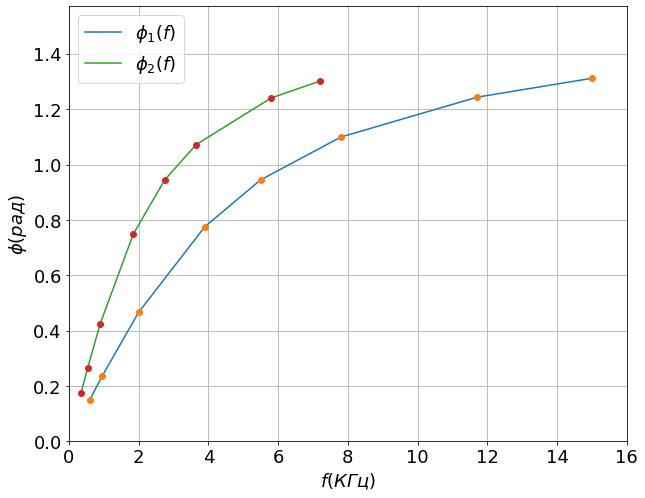

In [45]:
plt.figure(figsize = (10,8))
plt.ylabel(r"$\phi(рад)$")
plt.rc('font', size=18)
plt.xlabel(r"$f(КГц)$")
plt.grid();

#plt.axis('scaled')
plt.xlim(0, np.max(df.f) + 1)
plt.ylim(0, const.pi / 2)
#plt.yticks([const.pi/2, const.pi/3, const.pi/4,  const.pi/6, 0],["$\frac{pi}{2}$","$\frac{pi}{3}$","$\frac{pi}{4}$","$\frac{pi}{6}$","0"])

plt.plot(dfirst.f, dfirst.phi, '-', label = r"$\phi_1(f)$")
plt.plot(dfirst.f, dfirst.phi, 'o')
plt.plot(dsecond.f, dsecond.phi, '-', label = r"$\phi_2(f)$")
plt.plot(dsecond.f, dsecond.phi, 'o')
plt.legend(loc="best");

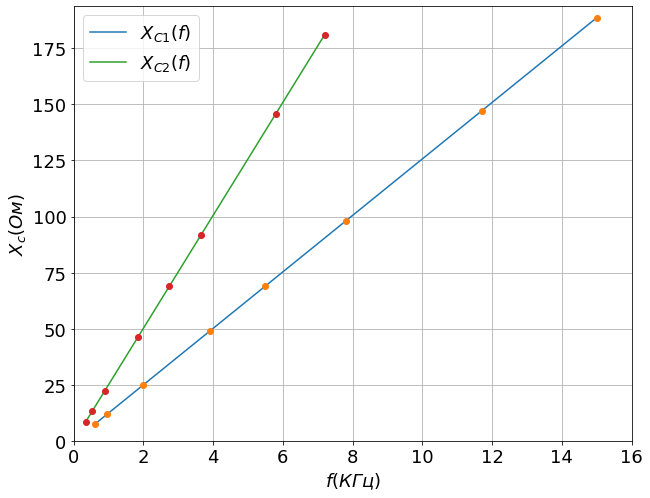

In [46]:
plt.figure(figsize = (10,8))
plt.ylabel(r"$X_L(Ом)$")
plt.rc('font', size=18)
plt.xlabel("$f(КГц)$")
plt.grid();

#plt.axis('scaled')
plt.xlim(0, np.max(df.f) + 1)
plt.ylim(0, np.max(df.X) + 5)
#plt.yticks([-const.pi/2, -const.pi/3, -const.pi/4,  -const.pi/6, 0],["$\frac{pi}{2}$","$\frac{pi}{3}$","$\frac{pi}{4}$","$\frac{pi}{6}$","0"])

plt.plot(dfirst.f, dfirst.X, '-', label = r"$X_{L1}(f)$")
plt.plot(dfirst.f, dfirst.X, 'o')
plt.plot(dsecond.f, dsecond.X, '-', label = r"$X_{L2}(f)$")
plt.plot(dsecond.f, dsecond.X, 'o')
plt.legend(loc="best");